In [2]:
#Importing the python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


Data importation and wrangling


In [3]:
data = pd.read_csv('Diabetes_Prediction (Project).csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0
...,...,...,...,...,...,...,...,...,...
995,1,103.496355,41.059401,24.930299,43.675978,25.846062,0.455884,19.905419,0
996,1,60.714150,64.082842,24.689064,111.562745,19.464280,0.250560,44.421874,1
997,0,97.597727,64.122312,22.140339,108.138552,22.733052,0.761463,58.949800,1
998,0,66.775137,55.908797,24.885274,219.521484,31.819187,0.382877,46.928923,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [6]:
data.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis'],
      dtype='object')

In [7]:
data.shape

(1000, 9)

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

Data Exploratory Analysis


In [9]:
#Distribution of the total insulin for the diagnosis
sel = data.groupby('Diagnosis')[['Insulin']].sum().sort_values(ascending = False, by = 'Insulin')
px.bar(data_frame=sel, x = sel.index, y= 'Insulin', color = 'Insulin', title = 'The total insulin for each diagnosis')

In [10]:
#Distribution of the average BMI for the diagnosis
sel = data.groupby('Diagnosis')[['BMI']].mean().sort_values(ascending = False, by = 'BMI')
px.bar(data_frame=sel, x = sel.index, y= 'BMI', color = 'BMI', title = 'The total BMI for each diagnosis')

In [12]:
#Distribution of average glucose among the diagnosis
sel = data.groupby('Diagnosis')[['Glucose']].mean().sort_values(ascending = False, by = 'Glucose')
px.pie(data_frame=sel, names = sel.index, values = 'Glucose', hole = 0.4, title = 'Distribution of average glucose of the diagnosis')

In [14]:
#Glucose distribution in the area
fig = px.histogram(data_frame=data, x = 'Glucose', nbins= 15, color = 'Glucose' ,title = 'Glucose distribution in the area')
fig.show()

In [15]:
#BloodPressure distribution in the area
fig = px.histogram(data_frame=data, x = 'BloodPressure', nbins= 15, color = 'BloodPressure' ,title = 'Blood Pressure distribution in the area')
fig.show()

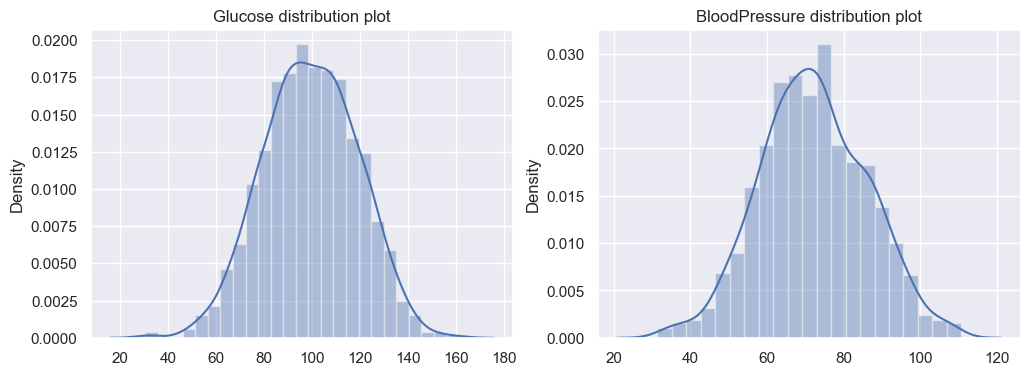

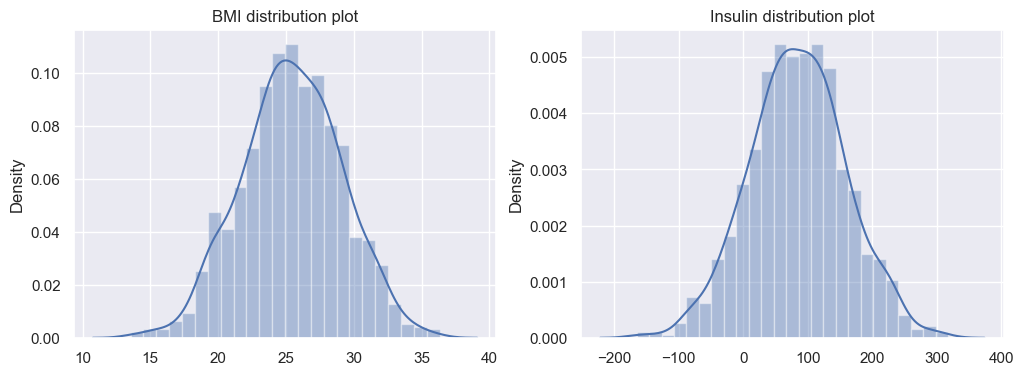

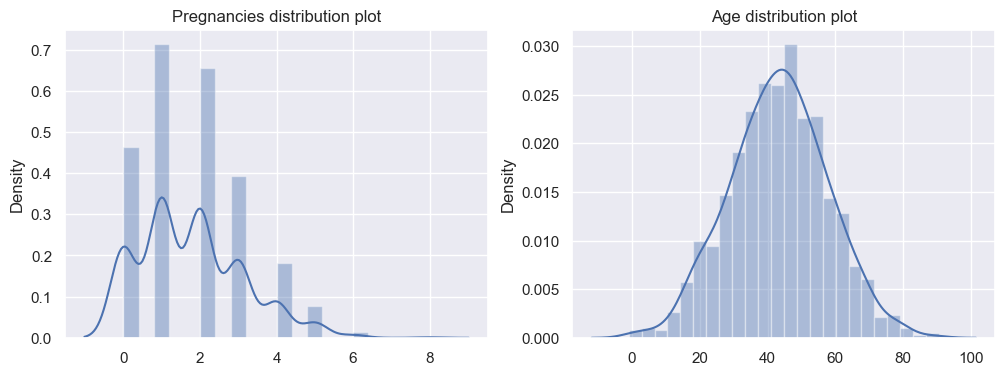

In [18]:
def plotter(dataframe,a,b):
    plt.figure(figsize=(12, 4))
    sns.set(style = 'darkgrid')

    plt.subplot(1,2,1)
    sns.distplot(x = data[a])
    plt.title(f'{a} distribution plot')

    plt.subplot(1,2,2)
    sns.distplot(x = data[b])
    plt.title(f'{b} distribution plot')

plotter(data, 'Glucose', 'BloodPressure')
plotter(data, 'BMI', 'Insulin')
plotter(data, 'Pregnancies', 'Age')




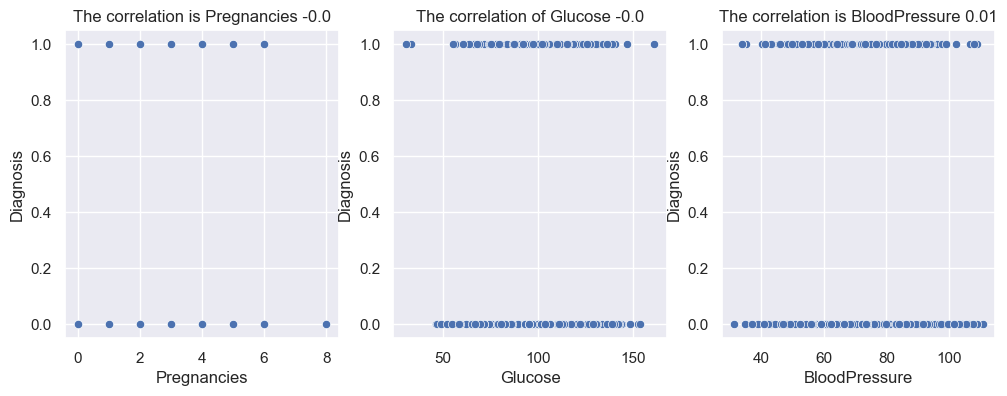

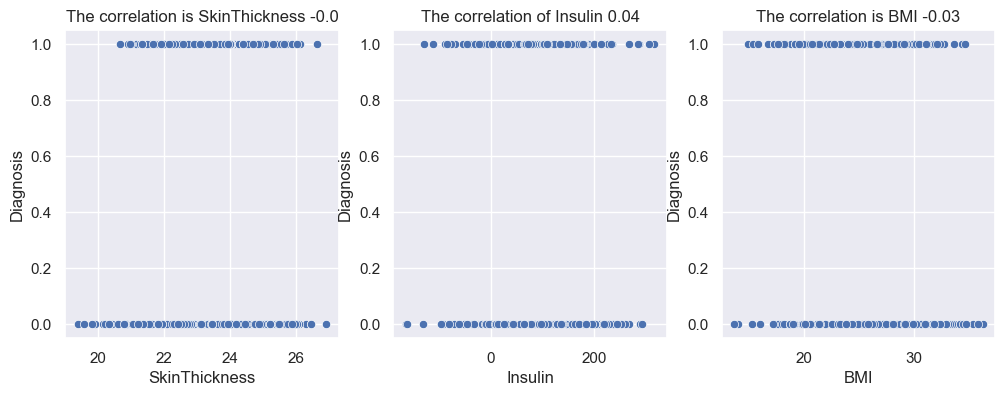

In [19]:
#Data Exploratory Analysis
#correlation analysis
def plotter(data,a,b,c,dependent):
    plt.figure(figsize = (12,4))
    sns.set(style = 'darkgrid')

    plt.subplot(1,3,1)
    sns.scatterplot(x = data[a], y = data[dependent])
    plt.title(f"The correlation is {a} {data[a].corr(data[dependent]).round(2)}")

    plt.subplot(1,3,2)
    sns.scatterplot(x = data[b], y = data[dependent])
    plt.title(f"The correlation of {b} {data[b].corr(data[dependent]).round(2)}")

    plt.subplot(1,3,3)
    sns.scatterplot(x = data[c], y = data[dependent])
    plt.title(f"The correlation is {c} {data[c].corr(data[dependent]).round(2)}")

plotter(data,"Pregnancies", "Glucose", "BloodPressure", "Diagnosis")
plotter(data,"SkinThickness", "Insulin", "BMI", "Diagnosis")

Data Preprocessing


In [21]:
from sklearn.preprocessing import StandardScaler
df = data.copy()
scaler = StandardScaler()
for column in data.drop('Diagnosis', axis = 1).columns:
    if column in df:
        df[column] = scaler.fit_transform(df[[column]])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,0.169163,0.843882,-1.136506,0.902150,0.130996,0.277179,-0.886898,-1.603337,0
1,0.169163,-0.357150,-0.112743,0.140873,0.722517,-0.413036,1.083028,0.112773,0
2,-0.569542,-0.580604,-0.642679,0.107438,0.865573,-0.944955,1.137547,0.343479,1
3,0.169163,0.463106,-0.316121,-2.153677,0.322962,-0.331933,-0.801800,-0.036791,0
4,-0.569542,1.459784,1.624917,-0.575543,-0.792577,2.050733,0.762580,-0.725127,0


Feature Selection

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

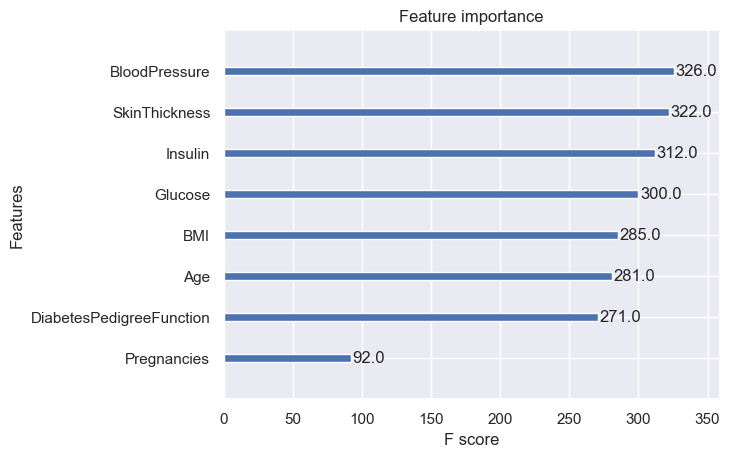

In [22]:
#Feature Selection 
import xgboost as xgb
from xgboost import XGBClassifier 
x  = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']
model = XGBClassifier()
model.fit(x, y)
xgb.plot_importance(model)

In [23]:
sel_columns = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Glucose', 'Diagnosis']
df = df[sel_columns]
df.head()

,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Glucose,Diagnosis
0,-1.136506,0.902150,0.130996,0.277179,-1.603337,-0.886898,0.843882,0
1,-0.112743,0.140873,0.722517,-0.413036,0.112773,1.083028,-0.357150,0
2,-0.642679,0.107438,0.865573,-0.944955,0.343479,1.137547,-0.580604,1
3,-0.316121,-2.153677,0.322962,-0.331933,-0.036791,-0.801800,0.463106,0
4,1.624917,-0.575543,-0.792577,2.050733,-0.725127,0.762580,1.459784,0


<Axes: xlabel='Diagnosis', ylabel='count'>

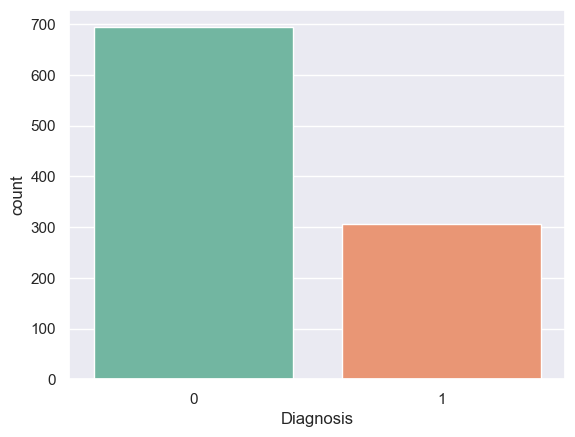

In [24]:
#Modelling
sns.countplot(x = df['Diagnosis'], palette='Set2')


In [25]:
#Data Evaluation 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,  confusion_matrix, mean_squared_log_error

dtc = DecisionTreeClassifier()
x = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state = 42, stratify = y)
dtc.fit(xtrain, ytrain)
cross_val = dtc.predict(xtrain)
print(classification_report(cross_val, ytrain))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       555
           1       1.00      1.00      1.00       245

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



SMOTE OVERSAMPLING 

In [35]:
#To get the best random state to use
score = []
for i in range(100):
    from imblearn.over_sampling import SMOTE
    from sklearn.metrics import accuracy_score, r2_score
    smote = SMOTE(sampling_strategy= 'auto', random_state = i)
    x_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)
    dtc = DecisionTreeClassifier()
    
    
    dtc.fit(x_resampled, y_resampled)
    cross_val = dtc.predict(x_resampled)
    score.append(r2_score(cross_val, y_resampled))
print(f'The highest accuracy_score of {i} is {score}')

    

The highest accuracy_score of 99 is [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [36]:
#Random Oversampling 
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)   

<Axes: xlabel='Diagnosis', ylabel='count'>

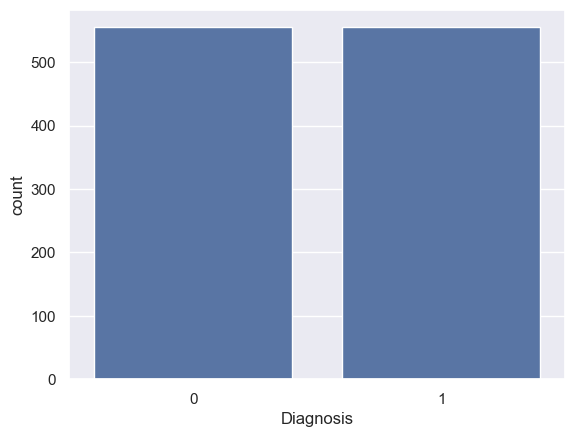

In [37]:
new_balanced_data_smote = pd.concat([x_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['Diagnosis'])

In [47]:

dtc.fit(x_resampled, y_resampled)

cross_val = dtc.predict(x_resampled)
print(classification_report(cross_val, y_resampled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       555
           1       1.00      1.00      1.00       555

    accuracy                           1.00      1110
   macro avg       1.00      1.00      1.00      1110
weighted avg       1.00      1.00      1.00      1110



<Axes: >

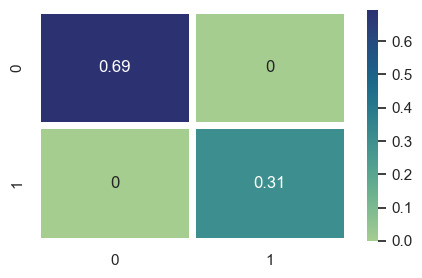

In [28]:
revealer = confusion_matrix(cross_val, ytrain)
plt.figure(figsize =(5, 3))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidth = 5)

In [48]:
test = dtc.predict(xtest)
print(classification_report(test, ytest))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64       116
           1       0.43      0.31      0.36        84

    accuracy                           0.54       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.52      0.54      0.52       200



<Axes: >

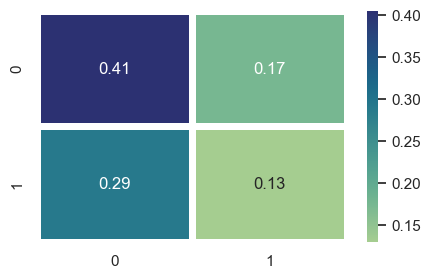

In [49]:
revealer = confusion_matrix(test, ytest)
plt.figure(figsize =(5, 3))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot = True, cmap = 'crest', linewidth = 5)

In [50]:
import pickle
pickle.dump(dtc, open('diabetes.pkl', 'wb'))